<a href="https://colab.research.google.com/github/cornflake15/data-course/blob/mining/data-mining/classification/neural-network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Artificial Neural Network

Implementasi algoritma Artificial Neural Network menggunakan Keras dan Tensorflow.

## 1. Pendahuluan

**Tensorflow** adalah platform/framework untuk membangun sebuah model machine learning yang bersifat open source. Tensorflow menyediakan fitur end-to-end / full stack development, dari prototyping hingga deployment model machine learning ke dalam aplikasi.

**Keras** adalah high-level API untuk mengimplementasikan Deep Learning pada platform Tensorflow. Sehingga developer/engineer bisa fokus terhadap pemodelan machine learningnya daripada cara memprogram model machine learning.

Install terlebih dahulu modul Tensorflow: 

`pip install tensorflow`

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

### 1.1 Inisialisasi model

Di bagian ini kita akan membangun model neural network yang paling sederhana, terdiri 1 input layer, 1 neuron, dan 1 layer output. Untuk mengimplementasikan ini kita bisa memanfaatkan kelas **`keras`** dari modul **`tensorflow`**. Kemudian memanggil method **`Sequential`** untuk mendefinisikan arsitektur neural networknya.

In [2]:
model = keras.Sequential([keras.layers.Dense(units=1, input_shape=[1])])

Di dalam method Sequential kita bisa mendefinisikan tumpukan layer-layer penyusun model dengan mengimplementasikan kelas **`keras.layers.Dense()`**. Untuk lebih lengkap mengenai method `Sequential` bisa dilihat pada [dokumentasinya](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential?version=nightly).

In [3]:
tf.keras.backend.clear_session()
model.compile(optimizer='sgd', loss='mean_squared_error')

Selanjutnya adalah mengimplementasikan fungsi optimasi dengan memanggil method **`compile`** melalui objek **`model`**. Di dalamnya kita definisikan atribut **`optimizer`** dan juga **`loss`** function yang digunakan. Jenis-jenis [fungsi optimasi](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers?version=nightly) dan [loss function](https://www.tensorflow.org/api_docs/python/tf/keras/losses) bisa langsung dibaca di dokumentasi resminya.

### 1.2 Dataset

Di bagian ini kita akan membuat dataset sederhana dalam bentuk array 1 dimensi menggunakan **`numpy`**. Data disimpan pada objek **`X`** dan label pada objek **`y`**.

In [4]:
X = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
y = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

### 1.3 Fitting

Setelah mempersiapkan dataset (*biasanya proses pre-processing dataset adalah proses yang panjang, bahkan lebih panjang dari proses pemodelan neural networknya. Namun sebagai permulaan di bagian ini belum membahas pre-processing*) hal selanjutnya dilakukan adalah fitting dataset ke dalam model.

Proses fitting diimplementasikan dengan memanggil method **`fit()`** melalui objek **`model`**. Method `fit()` menerima parameter input data, label data, dan epoch. Epoch mengacu pada satu kali putaran (_cycle_) untuk mendistribusikan seluruh dataset ke dalam model.

In [5]:
model.fit(X, y, epochs=10) # input data (X), label data (y), dan epoch (epochs)

Epoch 1/10
1/1 [==============================] - 2s 2s/step - loss: 5.0150
Epoch 2/10
1/1 [==============================] - 0s 3ms/step - loss: 4.1204
Epoch 3/10
1/1 [==============================] - 0s 4ms/step - loss: 3.4130
Epoch 4/10
1/1 [==============================] - 0s 3ms/step - loss: 2.8529
Epoch 5/10
1/1 [==============================] - 0s 3ms/step - loss: 2.4088
Epoch 6/10
1/1 [==============================] - 0s 3ms/step - loss: 2.0560
Epoch 7/10
1/1 [==============================] - 0s 3ms/step - loss: 1.7752
Epoch 8/10
1/1 [==============================] - 0s 5ms/step - loss: 1.5510
Epoch 9/10
1/1 [==============================] - 0s 5ms/step - loss: 1.3714
Epoch 10/10
1/1 [==============================] - 0s 4ms/step - loss: 1.2271


### 1.4 Prediksi

Setelah model di-training hal selanjutnya adalah melakukan prediksi. Implementasinya dapat dilakukan dengan memanggil method **`predict`** berdasarkan objek `model`, kemudian memasukkan nilai yang akan diprediksi ke dalam method tersebut. Seperti terlihat pada output di bawah, berapakah hasil prediksi untuk nilai input 10.0?. Anda bisa mencoba nilai lainnya untuk diprediksi.

In [6]:
print(model.predict([10.0]))

[[13.943926]]


## Contoh 1

Pada bagian ini adalah implementasi neural network berdasarkan studi kasus materi [Neural Network Demystified](https://www.youtube.com/playlist?list=PLiaHhY2iBX9hdHaRr6b7XevZtgZRa1PoU) dengan Tensorflow. Pada contoh tersebut terdapat dua atribut yaitu "Hour of Study" dan "Hour of Sleep", dan satu output yaitu "Test Score". Contoh data dapat dilihat pada tabel di bawah.

|Hour of Study|Hour of Sleep|Test Score|
|-------------|-------------|----------|
|3|5|75|
|5|1|82|
|10|2|93|
|3|2|60|
|4|3|63|
|6|7|94|
|8|10|97|

Data tersebut disimpan ke dalam struktur data numpy array dua dimensi (untuk atribut/fitur) dan numpy array satu dimensi untuk output.

In [7]:
X = np.array([[3, 5], [5, 1], [10, 2], [3, 2], [4, 3], [6, 7], [8, 10]]) # Input
y = np.array([75, 82, 93, 60, 63, 94, 97]) # Output

In [8]:
print(X.shape) # Dimensi array Input
print(y.shape) # Dimensi array Output

(7, 2)
(7,)


### Data Preprocessing

Di bagian ini kita cukup melakukan pre-processing dengan teknik `scaling` saja, karena datasetnya hanya bertipe numerikal. Scaling diimplementasikan dengan kelas **`StandardScaler`** pada modul **`sklearn.preprocessing`**.

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scale = scaler.fit_transform(X)
y_scale = scaler.fit_transform(y.reshape(-1, 1))

### Modeling

Model neural network yang akan diimplementasikan berdasarkan gambar berikut ini:
![model](https://github.com/cornflake15/data-course/blob/main/data-mining/classification/img/model-1.png?raw=1)

Kemudian kita bisa me-review model yang kita buat dengan memanggil method **`summary()`** pada objek **`model`**.

In [10]:
tf.keras.backend.clear_session()
model = keras.Sequential([
    keras.layers.Dense(2, input_shape=(2,)),
    keras.layers.Dense(3, activation='sigmoid'),
    keras.layers.Dense(1)
])
model.compile(optimizer='sgd', loss='mean_squared_error')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


### Model Fitting

In [11]:
model.fit(X, y, epochs=200)

Epoch 1/200
1/1 [==============================] - 0s 220ms/step - loss: 6607.3599
Epoch 2/200
1/1 [==============================] - 0s 5ms/step - loss: 6135.4731
Epoch 3/200
1/1 [==============================] - 0s 4ms/step - loss: 5522.5850
Epoch 4/200
1/1 [==============================] - 0s 4ms/step - loss: 4906.9009
Epoch 5/200
1/1 [==============================] - 0s 4ms/step - loss: 4358.4561
Epoch 6/200
1/1 [==============================] - 0s 6ms/step - loss: 3873.9011
Epoch 7/200
1/1 [==============================] - 0s 5ms/step - loss: 3445.7522
Epoch 8/200
1/1 [==============================] - 0s 4ms/step - loss: 3067.4392
Epoch 9/200
1/1 [==============================] - 0s 4ms/step - loss: 2733.1619
Epoch 10/200
1/1 [==============================] - 0s 4ms/step - loss: 2437.7942
Epoch 11/200
1/1 [==============================] - 0s 3ms/step - loss: 2176.8069
Epoch 12/200
1/1 [==============================] - 0s 6ms/step - loss: 1946.1986
Epoch 13/200
1/1 [=====

### Prediksi

In [12]:
print(model.predict([[5, 5]]))

[[80.571304]]


##  Studi Kasus 1


**Fashion MNIST**


<img src="https://github.com/cornflake15/data-course/blob/main/data-mining/classification/img/fashion-mnist-sprite.png?raw=1" alt="Drawing" style="width: 500px;"/>

Fashion MNIST adalah dataset gambar pakaian sebanyak 70,0000 gambar dengan resolusi 28x28 pixel dengan rentang nilai 0 sampai dengan 255. Dataset ini terdiri dari 10 kategori (label) seperti tertera di tabel bawah ini.

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>


Dataset ini sudah disediakan oleh Tensorflow sehingga kita tidak harus men-downloadnya secara terpisah. Dataset Fashion MNIST dapat di-download dengan memanggil modul **`tensorflow.keras.datasets.fashion_minist`**. 

Domain permasalahan yang bisa dipecahkan oleh neural network pada dataset ini adalah klasifikasi, sehingga kita harus memisahkan antara dataset yang digunakan untuk training dan dataset yang digunakan untuk testing.

In [13]:
mnist = tf.keras.datasets.fashion_mnist # download dataset
(training_images, training_labels), (test_images, test_labels) = mnist.load_data() # memisahkan dataset menjadi training dan testing

4423680/4422102 [==============================] - 0s 0us/step


**Tampilkan Contoh Data**

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

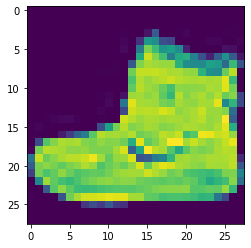

In [14]:
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200)
plt.imshow(training_images[0])
print(training_images[0])

**Normalisasi Data**

Ini adalah tahap pre-processing data dengan cara menormalisasi nilai setiap pixel dari gambar dengan cara membagi nilai tersebut dengan 255.

In [15]:
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [16]:
# Tampilkan data setelah dinormalisasi
print(np.around(training_images[0], 2)) # Dibulatkan sebanyak 2 angka sebagai contoh saja

[[0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.05 0.29 0.   0.   0.   0.02 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.01 0.   0.14 0.53 0.5  0.24 0.21 0.   0.   0.   0.   0.01 0.02 0.   0.   0.01]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.02 0.   0.4  0.8  0.69 0.53 0.56 0.48 0.09 0.   0.   0.   0.   0.05 0.04 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.61 0.93 0.81 0.7  0.42 0.61 0.63 0.43 0.25 0.09 0.3  0.51 0.28 0.06]

**Modeling**

In [17]:
tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation='relu'), 
                                    tf.keras.layers.Dense(10, activation='softmax')])
model.compile(optimizer = tf.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

**Model Fitting**

In [18]:
history = model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6352 - accuracy: 0.7799
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3873 - accuracy: 0.8622
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3445 - accuracy: 0.8760
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3125 - accuracy: 0.8859
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2928 - accuracy: 0.8906


**Evaluasi**

Setelah proses model fitting, maka dilakukan evaluasi kinerja model terhadap datatest.

In [19]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.3593 - accuracy: 0.8716


[0.3592548370361328, 0.8715999722480774]

**Visualisasikan Hasil Training**

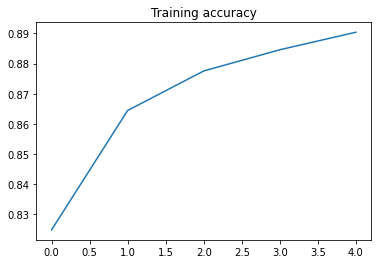

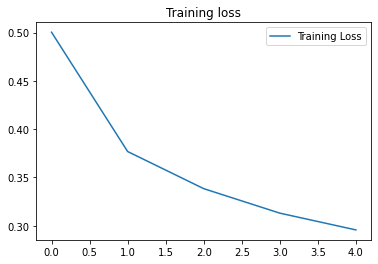

In [20]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label='Training accuracy')
plt.title('Training accuracy')

plt.figure()

plt.plot(epochs, loss, label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

Kedua grafik di atas menunjukkan performa model neural network terhadap hasil training. Semakin tinggi grafik Training Accuracy maka sepatutnya semakin baik performa modelnya saat training. Berbanding terbalik dengan Training Loss, jika grafiknya semakin menurun maka semakin baik performa trainingnya.

**Latihan 1**

Jalankan kode program di bawah ini:

In [21]:
classifications = model.predict(test_images)

print(classifications[0])

[2.7477834e-06 2.1829821e-06 8.8439663e-07 1.2558996e-07 5.3808426e-06 8.0379397e-02 3.9984261e-07 7.9622090e-02 2.4244480e-04 8.3974439e-01]


**Apa arti angka dari output kode program di atas?**

1.   10 nilai random yang tidak ada artinya
2.   10 klasifikasi yang dihasilkan dari model
3.   Nilai probabilitas dari setiap label


Jawaban: (3)

**Latihan 2**

Review kode program pendefinisian model yang telah kita lakukan di atas, kemudian kita ubah jumlah neurons pada hidden layer menjadi 512. Apakah terjadi perubahan pada nilai traning loss? Bagaimana menurut pendapat anda?

In [22]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3426
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0812
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0482
Epoch 4/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0341
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0865
[3.80077775e-10 1.15026065e-10 2.58460892e-10 5.43339866e-06 1.92653163e-12 2.04241901e-10 9.96483864e-15 9.99994278e-01 5.62571725e-11 2.12839367e-07]
7


## Latihan 3: 

Bagaimana kalau kita menghilangkan layer **`Flatten()`**? Apa yang akan terjadi?

In [23]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([#tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5


ValueError: ignored

Anda mendapatkan error mengenai "shape of the data", artinya dimensi data tidak sama dengan dimensi input yang diterima oleh input layer pada model. Ingat kembali bahwa dataset yang kita gunakan adalah gambar dengan resolusi 28x28 pixel, maka kita harus membuat input layer yang bisa memfasilitasi hal tersebut (_membuat kode program untuk memfasilitasi input gambar 28x28 sangat kompleks_).

Oleh karena itu, layer `Flatten()` berguna dalam hal mempermudah implementasi hal tersebut. Layer ini secara otomatis akan mengubah input 28x28 pixel menjadi array 1 dimensi sepanjang 748 (28 x 28 = 748).

**Latihan 4**:

Bagaimana kalau kita ubah jumlah neurons pada output layer menjadi 5, apakah yang akan terjadi? Mengapa hal itu terjadi?

In [24]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(5, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: nan
Epoch 2/5
1875/1875 [==============================] - 3s 1ms/step - loss: nan
Epoch 3/5
1875/1875 [==============================] - 3s 1ms/step - loss: nan
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: nan
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: nan
[nan nan nan nan nan]
7


**Latihan 5**: 

Kita akan menambahkan hidden layer baru dengan jumlah neurons sebanyak 256. Apakah yang akan terjadi? Mengapa hal itu terjadi?

In [27]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3204
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0848
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0509
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0389
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.0752
[6.5174859e-11 1.1577314e-07 3.9136594e-08 1.1099228e-06 3.3990497e-10 2.2279878e-09 9.6004332e-15 9.9998641e-01 2.4425451e-09 1.2294991e-05]
7


**Latihan 6**: 

Cobalah untuk menambahkan jumlah epoch secara bertahap menjadi 15, 30, 50, kemudian 100. Apakah yang akan terjadi? Dan mengapa hal itu terjadi?

In [28]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=30)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3338
Epoch 2/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0837
Epoch 3/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0513
Epoch 4/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0362
Epoch 5/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0243
Epoch 6/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0190
Epoch 7/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0157
Epoch 8/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0131
Epoch 9/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0097
Epoch 10/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0095
Epoch 11/30
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0078
Epoch 12/30
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0068
E

**Latihan 7**: 

Jika kita menghilangkan proses preprocessing, apa yang akan terjadi? Apakah anda akan mendapatkan hasil yang berbeda? 

In [29]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

# Preprocessing
# Berikan tag komentar pada baris kode program 6 dan 7
training_images = training_images/255.0
test_images = test_images/255.0

tf.keras.backend.clear_session()
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=10)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[34])
print(test_labels[34])

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3419
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0856
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0539
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0314
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0250
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0191
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0173
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0123
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0098
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.0848
[1.3703081e-17 7.2350692e-13 8.4751104e-09 7.7046792e-08 2.8730355e-17 3.6912063e-16 3.9372001e-19 9.9999988e-01 1.1356654e-10 6.0406981e-14]
7
